In [1]:
!pip install qutip
import qutip as qt

qt.cite()

@misc{qutip5,
  title = {{QuTiP} 5: The Quantum Toolbox in {Python}},
  author = {Lambert, Neill and Giguère, Eric and Menczel, Paul and Li, Boxi
    and Hopf, Patrick and Suárez, Gerardo and Gali, Marc and Lishman, Jake
    and Gadhvi, Rushiraj and Agarwal, Rochisha and Galicia, Asier
    and Shammah, Nathan and Nation, Paul D. and Johansson, J. R.
    and Ahmed, Shahnawaz and Cross, Simon and Pitchford, Alexander
    and Nori, Franco},
  year={2024},
  eprint={2412.04705},
  archivePrefix={arXiv},
  primaryClass={quant-ph},
  url={https://arxiv.org/abs/2412.04705},
  doi={10.48550/arXiv.2412.04705},
}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import random 
import scipy
from scipy.linalg import expm, sinm, cosm
from qutip import *
from scipy.integrate import solve_ivp
qt.cite()

# Defining the system
k = 4 # k-order squeezing drive 
m = 4 # Multiphoton damping
systemSize = 40 # Truncated Hilbert space 

#Defining operators 
a = qt.destroy(systemSize) # Lowering operator
aM = a**m 

aDagger = qt.create(systemSize) # Raising operator 
aDaggerM = aDagger**m

n_hat = aDagger* a # Number operator 
M_joint = (aDagger**m)*(a**m) # Combination of raising/lowering operators 
identity = qt.qeye(systemSize) # Identity operator 

# Defining parameters 
gamma1 = 1    # Single level decay rate 
gammaM = 0.01 # Multilevel decay rate 
delta = 0.4   # Detuning 
eta = 0.5
theta = 0
beta = 3
#beta = 2 * eta/gammaM

# Defining master equation 

# Hamiltonian
Hamiltonian = (delta * n_hat) + (1j * eta) * (a**k * np.exp(1j * theta * k) - aDagger**k * np.exp(-1j * theta * k))
    
# Collapse operators
c_ops = [np.sqrt(gamma1) * a, np.sqrt(gammaM) * aM]

# Liouvillian
L = qt.liouvillian(Hamiltonian, c_ops, data_only=False, chi=None)




# List of initial alpha values (coherent states)
#alpha_values = {
    #'alpha1': beta * (np.cos(1 * np.pi / k)+1 + (1j * (np.sin(1 * np.pi / k)-2))),
    #'alpha2': beta * (np.cos(3 * np.pi / k) + (1j * np.sin(3 * np.pi / k))),
    #'alpha3': beta * (np.cos(5 * np.pi / k) + (1j * np.sin(5 * np.pi / k))),
    #'alpha4': beta * (np.cos(7 * np.pi / k)-2 + (1j * (np.sin(7 * np.pi / k)-2)))
#}

alpha_values = {
    'alpha1': + 4 + (3 * 1j),
    'alpha2': - 4 + (2 * 1j),
    'alpha3': + 4 - (1 * 1j),
    'alpha4': - 4 - (4 * 1j)
}



# List of stationary solution (SS) values
SS_cor = 2.2
SS_values = [- SS_cor - SS_cor*1j, - SS_cor + SS_cor*1j, + SS_cor - SS_cor*1j, + SS_cor + SS_cor*1j]

# Dictionary to store results
results = {}

# Time span for the state evolution
time_list = np.logspace(-2, 3, 1000)


# Solver options
#options = qt.Options(nsteps=1000000, progress_bar=True)
options=qt.Options(nsteps=500000, method='bdf',progress_bar=True)


# Loop over each alpha value
for alpha_name, alpha in alpha_values.items():
    # Initial state
    rho0 = qt.coherent(systemSize, alpha=alpha)
    
    # Solve the master equation
    result = qt.mesolve(L, rho0, time_list, options=options)
    
    # Store the result
    results[alpha_name] = result

# Save results for each alpha value
for alpha_name, result in results.items():
    print(f"Results for {alpha_name}:")
    print(result.expect)
    np.save(f"evolution_{alpha_name} m = {m}, k = {k}  H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta} t = {time_list[0]} to{time_list[-1]}.npy", result.expect)
    rho_matrices = np.array([rho.full() for rho in result.states])  # Convert to NumPy arrays
    np.save(f"raw_evolution_{alpha_name}m = {m}, k = {k}  H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta} t = {time_list[0]} to{time_list[-1]}.npy", rho_matrices)



10.0%. Run time:   0.07s. Est. time left: 00:00:00:00


/opt/anaconda3/lib/python3.12/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(


20.0%. Run time:   0.30s. Est. time left: 00:00:00:01
30.0%. Run time:   0.58s. Est. time left: 00:00:00:01
40.0%. Run time:   1.42s. Est. time left: 00:00:00:02
50.1%. Run time:   4.16s. Est. time left: 00:00:00:04
60.1%. Run time:  12.86s. Est. time left: 00:00:00:08
70.1%. Run time:  42.08s. Est. time left: 00:00:00:17
80.1%. Run time: 138.25s. Est. time left: 00:00:00:34
90.1%. Run time: 445.58s. Est. time left: 00:00:00:49
100.0%. Run time: 1356.76s. Est. time left: 00:00:00:00
Total run time: 1356.76s
10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.26s. Est. time left: 00:00:00:01
30.0%. Run time:   0.54s. Est. time left: 00:00:00:01
40.0%. Run time:   1.37s. Est. time left: 00:00:00:02
50.1%. Run time:   4.06s. Est. time left: 00:00:00:04
60.1%. Run time:  12.73s. Est. time left: 00:00:00:08
70.1%. Run time:  40.26s. Est. time left: 00:00:00:17
80.1%. Run time: 136.86s. Est. time left: 00:00:00:34
90.1%. Run time: 446.60s. Est. time left: 00:00:00:49
1

<Figure size 640x480 with 0 Axes>

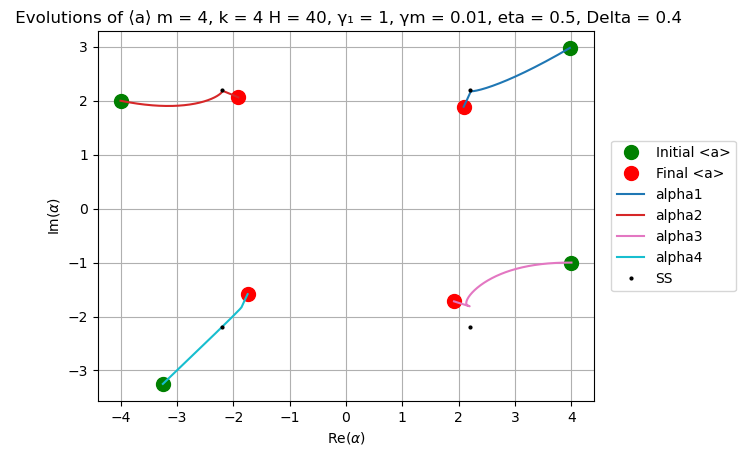

<Figure size 640x480 with 0 Axes>

In [8]:
#Plot trajectory of <a> in complex plane 

# Loop through the results dictionary
for alpha_name, result in results.items():
    # Calculate the expectation value of 'a' for the current alpha
    expect_a = qt.expect(a, result.states)
    
    # Extract the real and imaginary parts
    re_part = np.real(expect_a)
    im_part = np.imag(expect_a)
    
    # Define starting and ending points
    re_alpha_0 = re_part[0]
    im_alpha_0 = im_part[0]
    re_alpha_f = re_part[-1]
    im_alpha_f = im_part[-1]

    # if condition to stop the legend from labelling starting and finishing dot colour for each alpha (8 points), 
    #, instead made them all the starting same colour (green) and ending the same (red) so only need 2 dots in legend for this

    if alpha_name == 'alpha1':
        
        plt.plot(re_alpha_0, im_alpha_0, 'go', markersize=10, markeredgecolor="green",
                 markerfacecolor="green", label = 'Initial <a>')
        plt.plot(re_alpha_f, im_alpha_f, 'go', markersize=10, markeredgecolor="red", 
                 markerfacecolor="red", label = 'Final <a>')
    else:
        
        # Plots initial and final points to indicate direction of trajectory
        
        plt.plot(re_alpha_0, im_alpha_0, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
        plt.plot(re_alpha_f, im_alpha_f, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.plot(re_part, im_part, label= f'{alpha_name}') # Plot the whole evolution for the current alpha
    plt.grid(True) # Grid to make it easier to judge what range values are in 


#Plots stationary solutions that we obtained from mean field approximation, kept outside loop so not repeated 4 times

plt.plot(SS_values[0].real, SS_values[0].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black", label = 'SS')
plt.plot(SS_values[1].real, SS_values[1].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black")
plt.plot(SS_values[2].real, SS_values[2].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black")
plt.plot(SS_values[3].real, SS_values[3].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black")
#plt.xlim([-2.4,-1.6])
#plt.ylim([1.8,2.4])
#plt.xlim([1.4,2.2])
#plt.ylim([2,3.5])
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5)) #Puts legend next to plot rather than on it
plt.xlabel('Re('r'$\alpha$'')')
plt.ylabel('Im('r'$\alpha$'')')

# Labels title and png name so that we can easily identify what parameters were used to produce them 
plt.title(f' Evolutions of ⟨a⟩ m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}')
plt.savefig(f'Evolutions of ⟨a⟩ m = {m}, k = {k}  H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta} .png', bbox_inches='tight')
plt.figure()

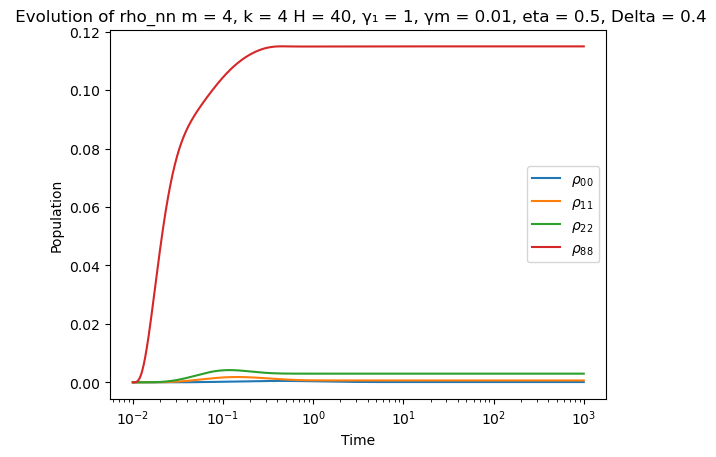

(-3.2488534425356046-3.2488534425356037j)
4.59457260059637
1000


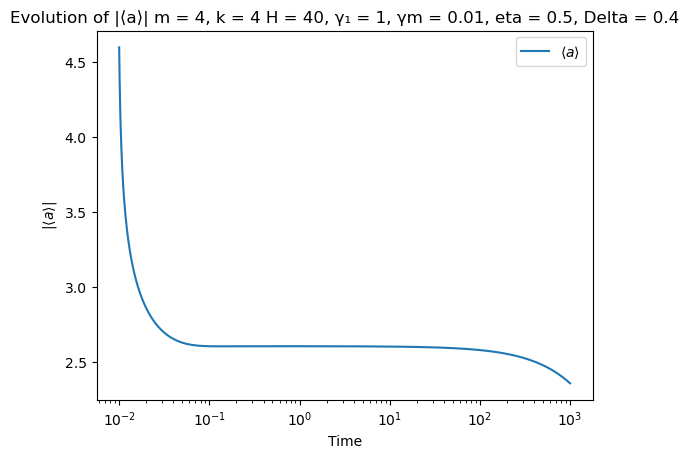

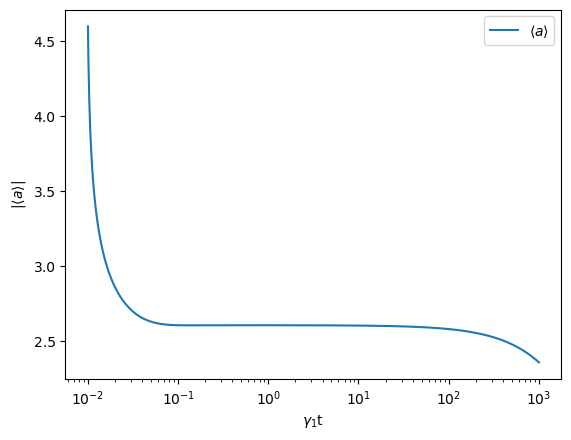

In [12]:
#Plot evolution of Fock state populations 

P0 = qt.fock_dm(systemSize, 0)  # Projector for ground state |0><0|
P1 = qt.fock_dm(systemSize, 1)  # Projector for first excited state |1><1|
P2 = qt.fock_dm(systemSize, 2)  # Projector for second excited state |2><2|
P4 = qt.fock_dm(systemSize, 4)  # Projector for fourth excited state |4><4|
P8 = qt.fock_dm(systemSize, 8)  # Projector for eighth excited state |8><8|

# Calculates the expectation of the fock state and the density matrix at each point in time (array index),
#, this gives the probability of being in this fock state at each point in time 
pop0 = [qt.expect(P0, state) for state in result.states]  # Population probability for |0><0|
pop1 = [qt.expect(P1, state) for state in result.states]  # Population probability for |1><1|
pop2 = [qt.expect(P2, state) for state in result.states]  # Population probability for |1><1|
pop4 = [qt.expect(P4, state) for state in result.states]  # Population probability for |4><4|
pop8 = [qt.expect(P8, state) for state in result.states]  # Population probability for |8><8|

# Plots the evolution of these different fock state probabilities as a finction of log time 
plt.plot(time_list, pop0, label=r'$\rho_{00}$')
plt.plot(time_list, pop1, label=r'$\rho_{11}$')
plt.plot(time_list, pop2, label=r'$\rho_{22}$')
#plt.plot(time_list, pop4, label=r'$\rho_{44}$')
plt.plot(time_list, pop8, label=r'$\rho_{88}$')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.title(f' Evolution of rho_nn m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}')
plt.savefig(f'Evolutions of rho_nn, m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}.png', bbox_inches='tight')
plt.show()

#Plot evolution of |<a>|
a_exp = [qt.expect(a, state) for state in result.states]  #Gives expectation of |<a>| at each point in time (array element)

# Take the modulus of each element of a_exp (will be complex values) to produce |<a>| 
a_exp_mod = np.zeros(len(a_exp))
for i in range(len(a_exp)):
    a_exp_mod[i] = abs(a_exp[i]) 

gamma1_time_list = gamma1 * time_list # Plot in paper we are replicating normalises time by gamma_1 * t so we will do the same to compare

# Plot the graph as a function of time 
plt.plot(time_list, a_exp_mod, label=r'$\langle a \rangle$')
plt.xlabel('Time')
plt.ylabel(r'|$\langle a \rangle$|')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.title(f'Evolution of |⟨a⟩| m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}')
plt.savefig(f'Evolution of |<a>| m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}.png', bbox_inches='tight')
plt.show()

# Plot the graph as a function of normalised gamma_1*time 
plt.plot(gamma1_time_list, a_exp_mod, label=r'$\langle a \rangle$')
plt.xlabel(r'$\gamma_{1}$' 't')
plt.ylabel(r'|$\langle a \rangle$|')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
#plt.savefig(f'Evolutions of |<a>| H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}.png', bbox_inches='tight')
plt.show()

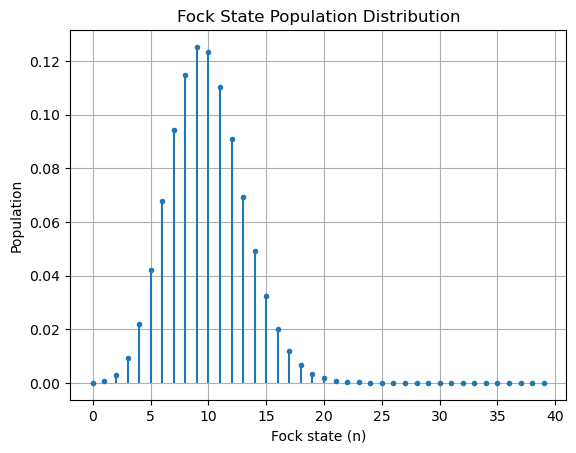

In [20]:
# Producing histogram of fock state populations for final state 

final_density_matrices = {} # Store results 

# Loops through results for different starting alpha 
for alpha_name, result in results.items():
    final_density_matrices[alpha_name] = result.states[-1]  # Last density matrix

rho_ss = final_density_matrices[alpha_name] #Select one of the alpha values (alpha4 in this case as last to be accessed)


pop_data = np.zeros(systemSize) # Array to store H different population values 
n = np.arange(systemSize) # Generates integer array from 0 to system size (truncated Hilbert space H)

for i in range(systemSize):
    P = qt.fock_dm(systemSize, i) # Creates projector for state |n><n|
    pop = qt.expect(P, rho_ss) # Calculates probability of being in fock state |n>
    pop_data[i] = pop

plt.stem(n, pop_data, basefmt=" ",markerfmt='.')  # Produces a discrete plot using stem
plt.xlabel("Fock state (n)")
plt.ylabel("Population probability")
plt.title("Fock State Population Population Distribution")
plt.grid(True)
plt.savefig('Fock state pop for SS from mesolve.png')
plt.show()

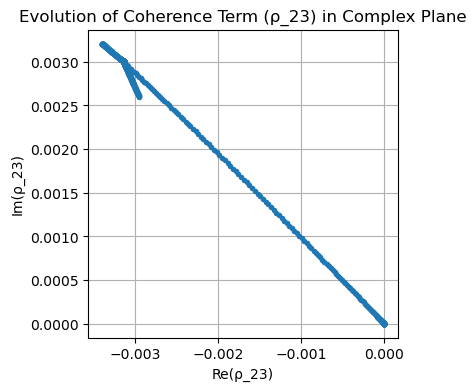

In [14]:
#Plot evolution of a coherence term

states = result.states  # List of density matrices

# Extract the (0,1) element (coherence term ρ_01)
re_parts_23 = [state.full()[2, 3].real for state in states]  # Real part of ρ_23
im_parts_23 = [state.full()[2, 3].imag for state in states]  # Imaginary part of ρ_23

# Plot trajectory in complex plane
plt.figure(figsize=(4, 4))
plt.plot(re_parts_23, im_parts_23, marker='.', linestyle='')

plt.xlabel("Re(ρ_23)")
plt.ylabel("Im(ρ_23)")
plt.title("Evolution of Coherence Term (ρ_23) in Complex Plane")
plt.grid()
plt.show()

In [41]:
print(pop0[-1])

0.050903900583142016


In [ ]:
# Code to continue simulations for times t > 10^3 s (seperated as it takes much longer than t < 10^3)

import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import random 
import scipy
from scipy.linalg import expm, sinm, cosm
from qutip import *
from scipy.integrate import solve_ivp

k = 4
m = 4
systemSize = 40

#Defining operators 
a = qt.destroy(systemSize)
aM = a**m

aDagger = qt.create(systemSize)
aDaggerM = aDagger**m

n_hat = aDagger* a
M_joint = (aDagger**m)*(a**m)
identity = qt.qeye(systemSize)

#Defining parameters 
gamma1 = 1.0
gammaM = 0.01
delta = 0.4
eta = 0.5
theta = 0
beta = 3
#beta = 2 * eta/gammaM

# Defining master equation 

# Hamiltonian
Hamiltonian = (delta * n_hat) + (1j * eta) * (a**k * np.exp(1j * theta * k) - aDagger**k * np.exp(-1j * theta * k))
    
# Collapse operators
c_ops = [np.sqrt(gamma1) * a, np.sqrt(gammaM) * aM]

# Liouvillian
L = qt.liouvillian(Hamiltonian, c_ops, data_only=False, chi=None)




# List of alpha values
alpha_values = {
    #'alpha1': beta * (np.cos(1 * np.pi / k)+1 + (1j * (np.sin(1 * np.pi / k)-2))),
    'alpha2': beta * (np.cos(3 * np.pi / k) + (1j * np.sin(3 * np.pi / k))),
    #'alpha3': beta * (np.cos(5 * np.pi / k) + (1j * np.sin(5 * np.pi / k))),
    'alpha4': beta * (np.cos(7 * np.pi / k)-2 + (1j * (np.sin(7 * np.pi / k)-2)))
}



# List of stationary solution (SS) values
SS_cor = 2.2
SS_values = [- SS_cor - SS_cor*1j, - SS_cor + SS_cor*1j, + SS_cor - SS_cor*1j, + SS_cor + SS_cor*1j]


# Time span for the state evolution
time_list = np.logspace(-2, 3, 10000)
time_list_continued = np.logspace(4, 5, 100)

options = qt.Options(nsteps=100000000, progress_bar=True)

# Dictionary to store results
extended_results = {}

# Load in saved data from t = 10^-2 to 10^3 simulation to continue from the end of that 
for alpha_name in alpha_values.keys():
    print(f"Loading saved data for {alpha_name}...")

    # Load the last saved density matrix
    rho_matrices = np.load(f" m = 4, k = 4  H = 40, γ₁ = 1, γm = 0.01, eta = 0.5, Delta = 0.4raw_evolution_continued_{alpha_name}.npy") # Load all states
    
    last_rho_matrix = rho_matrices[-1]  # Get the last state as to continue this should be our starting state 

    # Convert back to QuTiP density matrix
    last_state = qt.Qobj(last_rho_matrix)

    print(f"Running extended simulation for {alpha_name}...")

    # Solve master equation for the extended time range
    result_continued = qt.mesolve(L, last_state, time_list_continued, options=options)

    # Store results
    extended_results[alpha_name] = result_continued

    # Save extended data
    np.save(f" (t = 10^4 - 10^5 s) m = 4, k = 4  H = 40, γ₁ = 1, γm = 0.01, eta = 0.5, Delta = 0.4evolution_continued_{alpha_name}.npy", result_continued.expect)
    rho_matrices_continued = np.array([rho.full() for rho in result_continued.states])
    np.save(f" (t = 10^4 - 10^5 s) m = 4, k = 4  H = 40, γ₁ = 1, γm = 0.01, eta = 0.5, Delta = 0.4raw_evolution_continued_{alpha_name}.npy", rho_matrices_continued)

print("Extended simulations complete!")


Loading saved data for alpha2...
Running extended simulation for alpha2...
10.1%. Run time: 6070.80s. Est. time left: 00:15:00:30
20.2%. Run time: 13143.73s. Est. time left: 00:14:25:17


(-1.9085342577673687+2.1003343601453284j)
2.8379407036579756
100


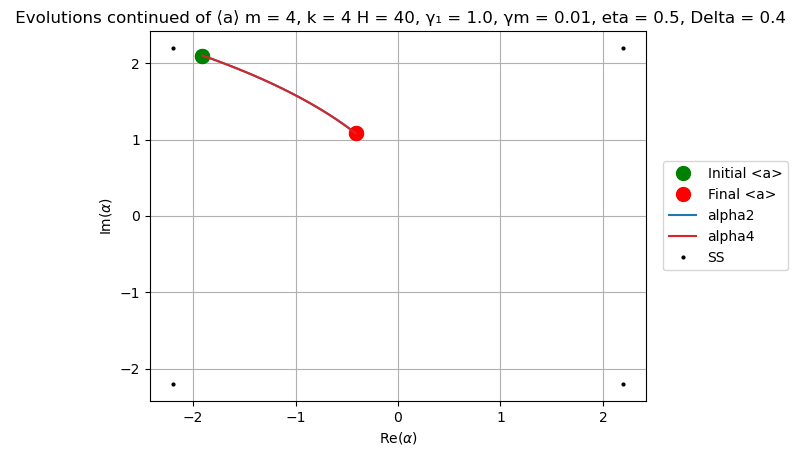

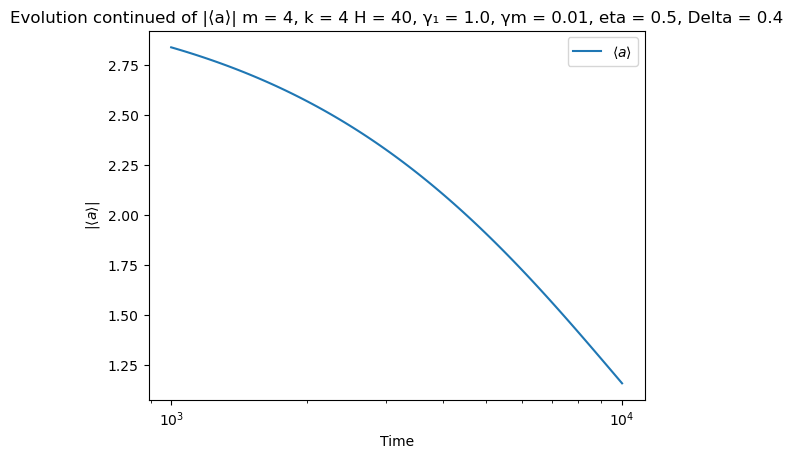

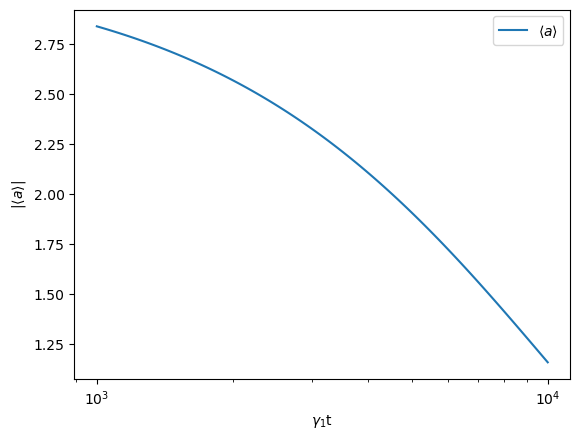

(9.543813925354313e-05+2.902142425842874e-17j)
(0.0006466198303753191-3.120207407531687e-19j)
(0.002961349698790017-2.0703336049456124e-18j)
(0.009266526129396744+3.5379626313546574e-19j)
(0.022003744538913846+1.4059847417503124e-18j)
(0.0421703715965761-8.687167534261552e-19j)
(0.06784730621098814-1.0018791994734673e-18j)
(0.09415694611220499+4.524043091359387e-17j)
(0.11494192487755554-3.669438752184426e-18j)
(0.12523866369375639-3.993680281923968e-18j)
(0.12320035730245352+1.1264648176163466e-16j)
(0.11046840148323135-1.2824985748724892e-14j)
(0.09100295988446211-2.373582492503268e-18j)
(0.06932110818825842+5.350015323009304e-17j)
(0.04909747209168722-9.651384033524306e-15j)
(0.032493519427864326+8.197876152714656e-13j)
(0.020182480327601712+7.323196006593719e-18j)
(0.011807937329490108-1.7303224733081997e-15j)
(0.006528281747455215+2.500837795984651e-13j)
(0.003421307827022178-1.7874311181927557e-11j)
(0.0017043844070535068-1.0765630885506347e-16j)
(0.0008089716698412302+2.04550533

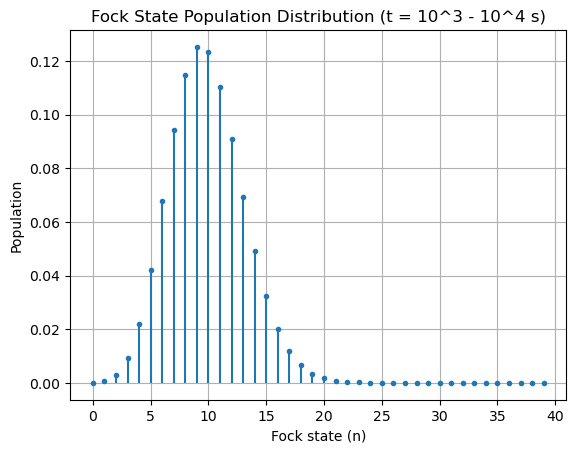

In [36]:
# Producing all the same plots as before but for extended time span 

# Loop through the extended results dictionary
for alpha_name, result in extended_results.items():
    # Calculate the expectation value of 'a' for the current alpha
    expect_a = qt.expect(a, result.states)
    
    # Extract the real and imaginary parts
    re_part = np.real(expect_a)
    im_part = np.imag(expect_a)
    
    # Define starting and ending points
    re_alpha_0 = re_part[0]
    im_alpha_0 = im_part[0]
    re_alpha_f = re_part[-1]
    im_alpha_f = im_part[-1]
    
    # Plot the evolution for the current alpha
    #plt.figure()

    if alpha_name == 'alpha2':
        
        plt.plot(re_alpha_0, im_alpha_0, 'go', markersize=10, markeredgecolor="green",
                 markerfacecolor="green", label = 'Initial <a>')
        plt.plot(re_alpha_f, im_alpha_f, 'go', markersize=10, markeredgecolor="red", 
                 markerfacecolor="red", label = 'Final <a>')
    else:
        plt.plot(re_alpha_0, im_alpha_0, marker="o", markersize=10, markeredgecolor="green", markerfacecolor="green")
        plt.plot(re_alpha_f, im_alpha_f, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")
    plt.plot(re_part, im_part, label= f'{alpha_name}')
    plt.grid(True)
    #plt.show()



plt.plot(SS_values[0].real, SS_values[0].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black", label = 'SS')
plt.plot(SS_values[1].real, SS_values[1].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black")
plt.plot(SS_values[2].real, SS_values[2].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black")
plt.plot(SS_values[3].real, SS_values[3].imag, 'go', markersize=2, markeredgecolor="black", markerfacecolor="black")
#plt.xlim([-2.4,-1.6])
#plt.ylim([1.8,2.4])
#plt.xlim([1.4,2.2])
#plt.ylim([2,3.5])
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.xlabel('Re('r'$\alpha$'')')
plt.ylabel('Im('r'$\alpha$'')')
plt.title(f' Evolutions continued of ⟨a⟩ m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}')
plt.savefig(f'Evolutions (t = 10^4 - 10^5 s) of ⟨a⟩ m = {m}, k = {k}  H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta} .png', bbox_inches='tight')
plt.figure()


a_exp = [qt.expect(a, state) for state in result.states]  
print(a_exp[0])
print(abs(a_exp[0]))
print(len(a_exp))

a_exp_mod = np.zeros(len(a_exp))
for i in range(len(a_exp)):
    a_exp_mod[i] = abs(a_exp[i]) 

gamma1_time_list_continued = gamma1 * time_list_continued

plt.plot(time_list_continued, a_exp_mod, label=r'$\langle a \rangle$')
plt.xlabel('Time')
plt.ylabel(r'|$\langle a \rangle$|')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
plt.title(f'Evolution continued of |⟨a⟩| m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}')
plt.savefig(f'Evolution (t = 10^4 - 10^5 s) of |<a>| m = {m}, k = {k} H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}, Delta = {delta}.png', bbox_inches='tight')
plt.show()

plt.plot(gamma1_time_list_continued, a_exp_mod, label=r'$\langle a \rangle$')
plt.xlabel(r'$\gamma_{1}$' 't')
plt.ylabel(r'|$\langle a \rangle$|')
plt.legend()
plt.xscale('log')  # Since time_list is in logspace
#plt.savefig(f'Evolutions of |<a>| H = {systemSize}, γ₁ = {gamma1}, γm = {gammaM}, eta = {eta}.png', bbox_inches='tight')
plt.show()




final_density_matrices = {}

for alpha_name, result in extended_results.items():
    final_density_matrices[alpha_name] = result.states[-1]  # Last density matrix

rho_ss = final_density_matrices[alpha_name]

pop_data = np.zeros(systemSize)
n = np.arange(systemSize)  # Use arange for integer values

for i in range(systemSize):
    P = qt.fock_dm(systemSize, i)
    pop = qt.expect(P, rho_ss)
    print(pop)
    #  Dealing with how python sometimes sets values that should be zero to very small numbers like 10^-15,
    #, which makes value complex and so it can't be used in a list
    if pop.imag < 10**-7: 
        pop = pop.real
    pop_data[i] = pop
print(sum(pop_data))

plt.stem(n, pop_data, basefmt=" ",markerfmt='.')  # Discrete plot using stem
plt.xlabel("Fock state (n)")
plt.ylabel("Population")
plt.title("Fock State Population Distribution (t = 10^4 - 10^5 s)")
plt.grid(True)
plt.savefig('Fock state pop for SS from mesolve (t = 10^4 - 10^5 s).png')
plt.show()